<a href="https://colab.research.google.com/github/faisu6339-glitch/Machine-learning/blob/main/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Gradient Descent?

Gradient Descent is an optimization algorithm used to minimize a function. In machine learning, this function is typically a **cost function** (or loss function) that measures the error of a model's predictions. The goal is to find the set of model parameters (e.g., weights and biases) that minimizes this cost function.

### How Does it Work?

Imagine you are hiking down a mountain in a thick fog, and your goal is to reach the lowest point (the minimum of the cost function). You can only see your immediate surroundings. What do you do?

1.  **Look around**: Determine the steepest downward slope (the **gradient**).
2.  **Take a step**: Move a small distance in that direction.
3.  **Repeat**: Keep taking steps until you can no longer go down, or until the steps become very small.

In mathematical terms, Gradient Descent iteratively adjusts the model's parameters in the direction opposite to the gradient of the cost function with respect to those parameters. The size of each step is determined by a hyperparameter called the **learning rate**.

### Gradient Descent for Linear Regression

For **Linear Regression**, our model is typically represented as `y_pred = mx + b`, where `m` is the slope and `b` is the y-intercept. Our goal is to find the `m` and `b` that best fit our data.

The most common **cost function** for linear regression is the **Mean Squared Error (MSE)**, defined as:

`MSE = (1/N) * Σ(y_i - y_pred_i)^2`

where `N` is the number of data points, `y_i` is the actual value, and `y_pred_i` is the predicted value.

To apply Gradient Descent, we need to calculate the **partial derivatives** of the MSE with respect to `m` and `b`. These derivatives tell us the direction of the steepest ascent. We then move in the opposite direction.

*   **Gradient for `m`**: `∂MSE/∂m = (-2/N) * Σ(x_i * (y_i - y_pred_i))`
*   **Gradient for `b`**: `∂MSE/∂b = (-2/N) * Σ(y_i - y_pred_i)`

The update rules for `m` and `b` are:

*   `m = m - learning_rate * ∂MSE/∂m`
*   `b = b - learning_rate * ∂MSE/∂b`

We repeat these updates for a fixed number of iterations or until the changes in `m` and `b` become very small.

Optimized Slope (m): 2.97
Optimized Intercept (b): 4.40


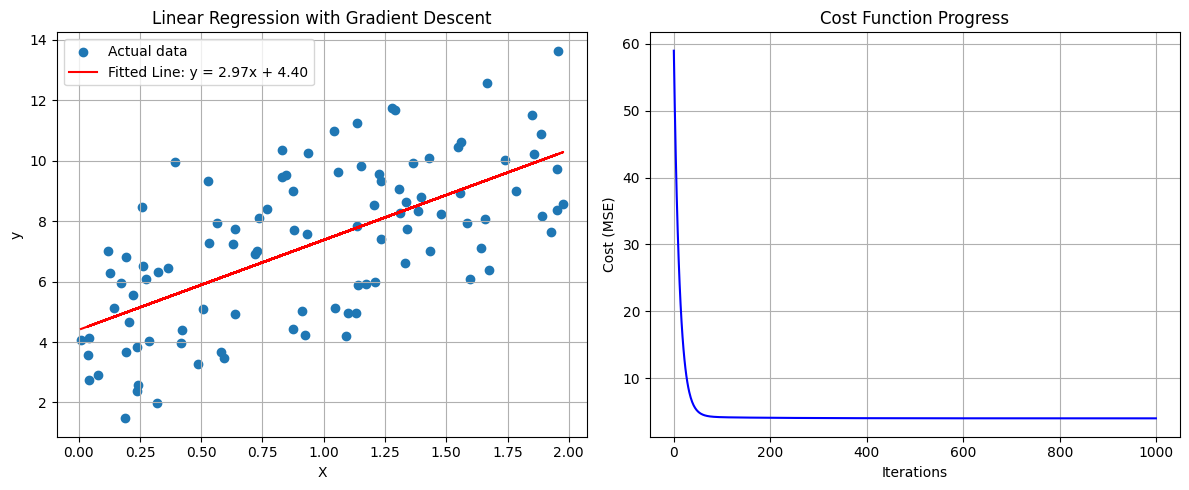

In [32]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate some synthetic data for linear regression
np.random.seed(0)
X = 2 * np.random.rand(100, 1) # 100 data points, 1 feature
y = 4 + 3 * X + np.random.randn(100, 1) * 2 # y = 4 + 3X + noise

# Add an intercept term to X (for easier matrix operations if we were to use them, but here we handle 'b' separately)
X_b = np.c_[np.ones((100, 1)), X]

# 2. Initialize parameters (slope 'm' and intercept 'b')
m = 0 # initial slope
b = 0 # initial intercept

# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000
n_samples = len(y)

# Store values for plotting later
m_history = []
b_history = []
cost_history = []

# 3. Perform Gradient Descent
for iteration in range(n_iterations):
    # Calculate predictions
    y_pred = m * X + b

    # Calculate the error
    error = y - y_pred

    # Calculate gradients of the MSE with respect to m and b
    # ∂MSE/∂m = (-2/N) * Σ(x_i * (y_i - y_pred_i))
    d_m = (-2/n_samples) * np.sum(X * error)
    # ∂MSE/∂b = (-2/N) * Σ(y_i - y_pred_i))
    d_b = (-2/n_samples) * np.sum(error)

    # Update parameters
    m = m - learning_rate * d_m
    b = b - learning_rate * d_b

    # Calculate current cost (MSE) and store history
    cost = (1/n_samples) * np.sum(error**2)
    m_history.append(m)
    b_history.append(b)
    cost_history.append(cost)

# 4. Print the optimized parameters
print(f"Optimized Slope (m): {m:.2f}")
print(f"Optimized Intercept (b): {b:.2f}")

# The actual values were m=3 and b=4

# 5. Visualize the results
plt.figure(figsize=(12, 5))

# Plot data and the fitted line
plt.subplot(1, 2, 1)
plt.scatter(X, y, label='Actual data')
plt.plot(X, m * X + b, color='red', label=f'Fitted Line: y = {m:.2f}x + {b:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.grid(True)

# Plot cost history
plt.subplot(1, 2, 2)
plt.plot(cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost Function Progress')
plt.grid(True)

plt.tight_layout()
plt.show()

### Key Considerations:

*   **Learning Rate**: A crucial hyperparameter. If too large, the algorithm might overshoot the minimum; if too small, it will take a very long time to converge.
*   **Local Minima**: For complex cost functions, Gradient Descent might get stuck in a local minimum rather than finding the global minimum. However, for linear regression with MSE, the cost function is convex, guaranteeing convergence to the global minimum.
*   **Variants**: There are several variants like Stochastic Gradient Descent (SGD), Mini-batch Gradient Descent, Adam, RMSprop, etc., which differ in how they calculate and apply gradients (e.g., using subsets of data instead of the full dataset for each update).

In [33]:
import numpy as np

# Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 9, 12, 15])

# Initialize
w = 0
b = 0
lr = 0.01
epochs = 1000
n = len(X)

for _ in range(epochs):
    y_pred = w * X + b

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w = w - lr * dw
    b = b - lr * db

print("Weight:", w)
print("Bias:", b)


Weight: 2.9927705260079667
Bias: 0.026100695010915737


In [34]:
for i in range(n):
    y_pred = w * X[i] + b


In [35]:
import numpy as np

# Dataset
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

# Initialize parameters
w = 0.0
b = 0.0
lr = 0.01
epochs = 1000
n = len(X)

# Gradient Descent
for _ in range(epochs):
    y_pred = w * X + b

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w -= lr * dw
    b -= lr * db

print("Final Weight:", w)
print("Final Bias:", b)


Final Weight: 1.9951803506719779
Final Bias: 0.017400463340610635


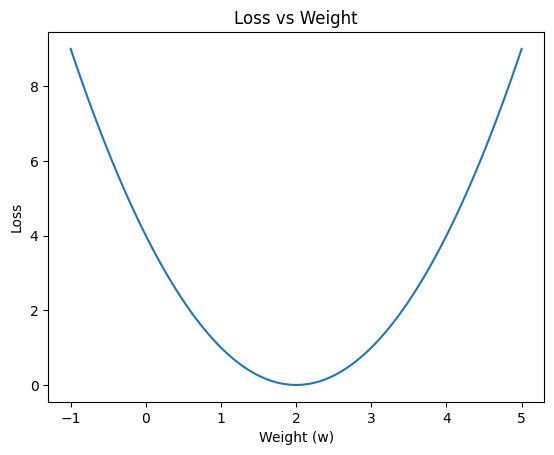

In [36]:
import numpy as np
import matplotlib.pyplot as plt

w_values = np.linspace(-1, 5, 100)
loss = [(w-2)**2 for w in w_values]  # parabola

plt.plot(w_values, loss)
plt.xlabel("Weight (w)")
plt.ylabel("Loss")
plt.title("Loss vs Weight")
plt.show()


In [37]:
from sklearn.datasets import make_regression
import numpy as np

In [38]:
X,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)


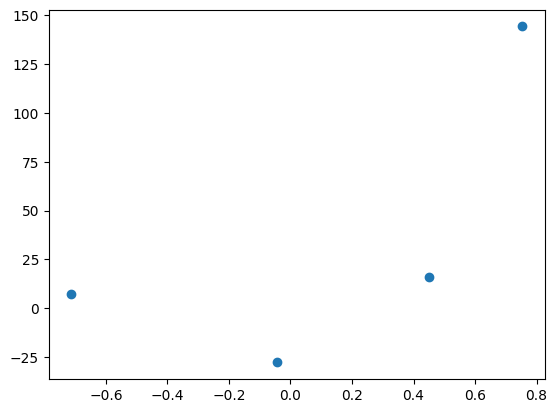

In [39]:
import matplotlib.pyplot as plt
plt.scatter(X,y)
plt.show()

In [40]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [41]:
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None)

LinearRegression()

In [42]:
reg.coef_

array([78.35063668])

In [43]:
reg.intercept_

np.float64(26.15963284313262)

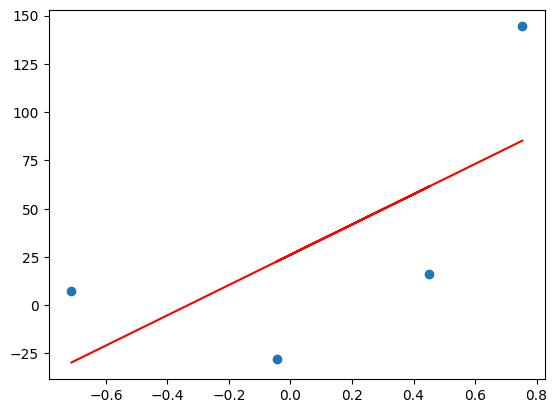

In [44]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red')

In [45]:
y_pred=((78.35*X)+0).reshape(4)

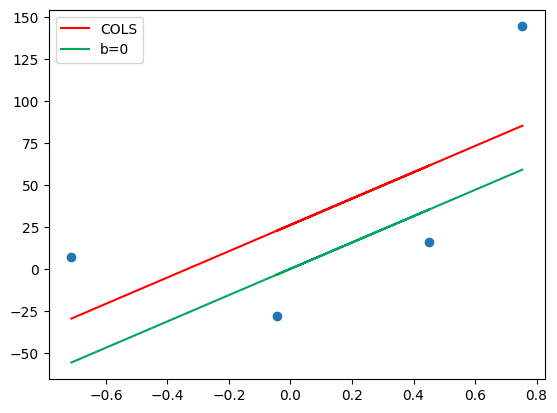

In [46]:
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='red',label='COLS')
plt.plot(X,y_pred,color="#00a65a",label='b=0')
plt.legend()
plt.show()

In [47]:
m=78.35
b=0

In [48]:
loss_slope= -2 *np.sum(y -m*X.ravel() -b)
loss_slope

np.float64(-209.27763408209216)

In [49]:
lr=0.1

step_size=loss_slope*lr
step_size

np.float64(-20.927763408209216)

In [50]:
b=b-step_size
b

np.float64(20.927763408209216)

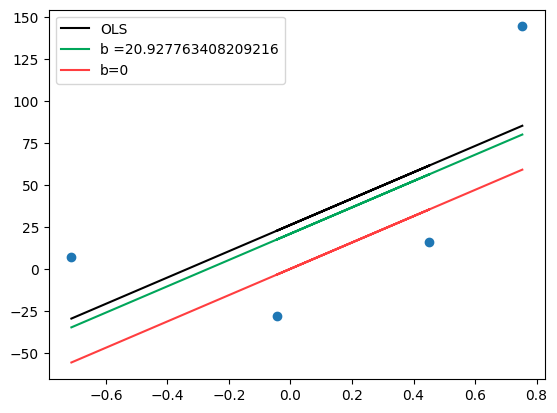

In [51]:
y_pred1=((78.35* X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred1,color="#00a65a",label='b ={}'.format(b))
plt.plot(X,y_pred,color='#FF3E40',label='b=0')
plt.legend()
plt.show()

### Understanding the Gradient Descent Step

The plot you just saw visualizes the effect of a single Gradient Descent step on the intercept (b) of our linear regression model. Let's break it down:

*   **Black Line (OLS)**: This represents the optimal linear regression line found by the Ordinary Least Squares (OLS) method (using `sklearn.linear_model`). This line minimizes the Mean Squared Error globally and serves as our target.

*   **Red Line (b=0)**: This is our starting point. We initially set the intercept `b` to zero, which means the regression line is forced to pass through the origin.

*   **Green Line (b = {:.2f})**: After calculating the `loss_slope` (gradient) and taking one `step_size` (controlled by the `learning_rate`), the intercept `b` has been updated from `0` to `{:.2f}`. You can observe that this new green line is now closer to the black OLS line, demonstrating that Gradient Descent is moving our model's parameters in the direction that reduces the error.

This iterative process of calculating the gradient and updating parameters is the core of Gradient Descent, gradually bringing the fitted line closer to the optimal solution.

#Iteration 2

In [52]:
loss_slope=-2 * np.sum(y -m*X.ravel() -b)
loss_slope

np.float64(-41.85552681641843)

In [53]:
step_size=loss_slope*lr
step_size

np.float64(-4.185552681641844)

In [54]:
b=b-step_size
b

np.float64(25.11331608985106)

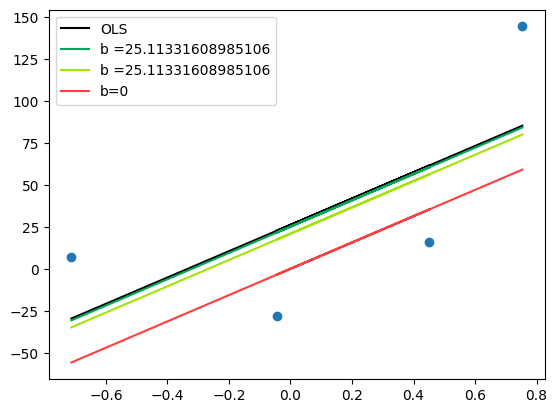

In [55]:
y_pred2=((78.35* X)+b).reshape(4)

plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred2,color="#00a65a",label='b ={}'.format(b))
plt.plot(X,y_pred1,color="#A3E407",label='b ={}'.format(b))
plt.plot(X,y_pred,color='#FF3E40',label='b=0')
plt.legend()
plt.show()

#Iteration 3

In [56]:
loss_slope= -2*np.sum(y-m*X.ravel() -b)
loss_slope

np.float64(-8.371105363283675)

In [57]:
step_size=loss_slope*lr
step_size

np.float64(-0.8371105363283675)

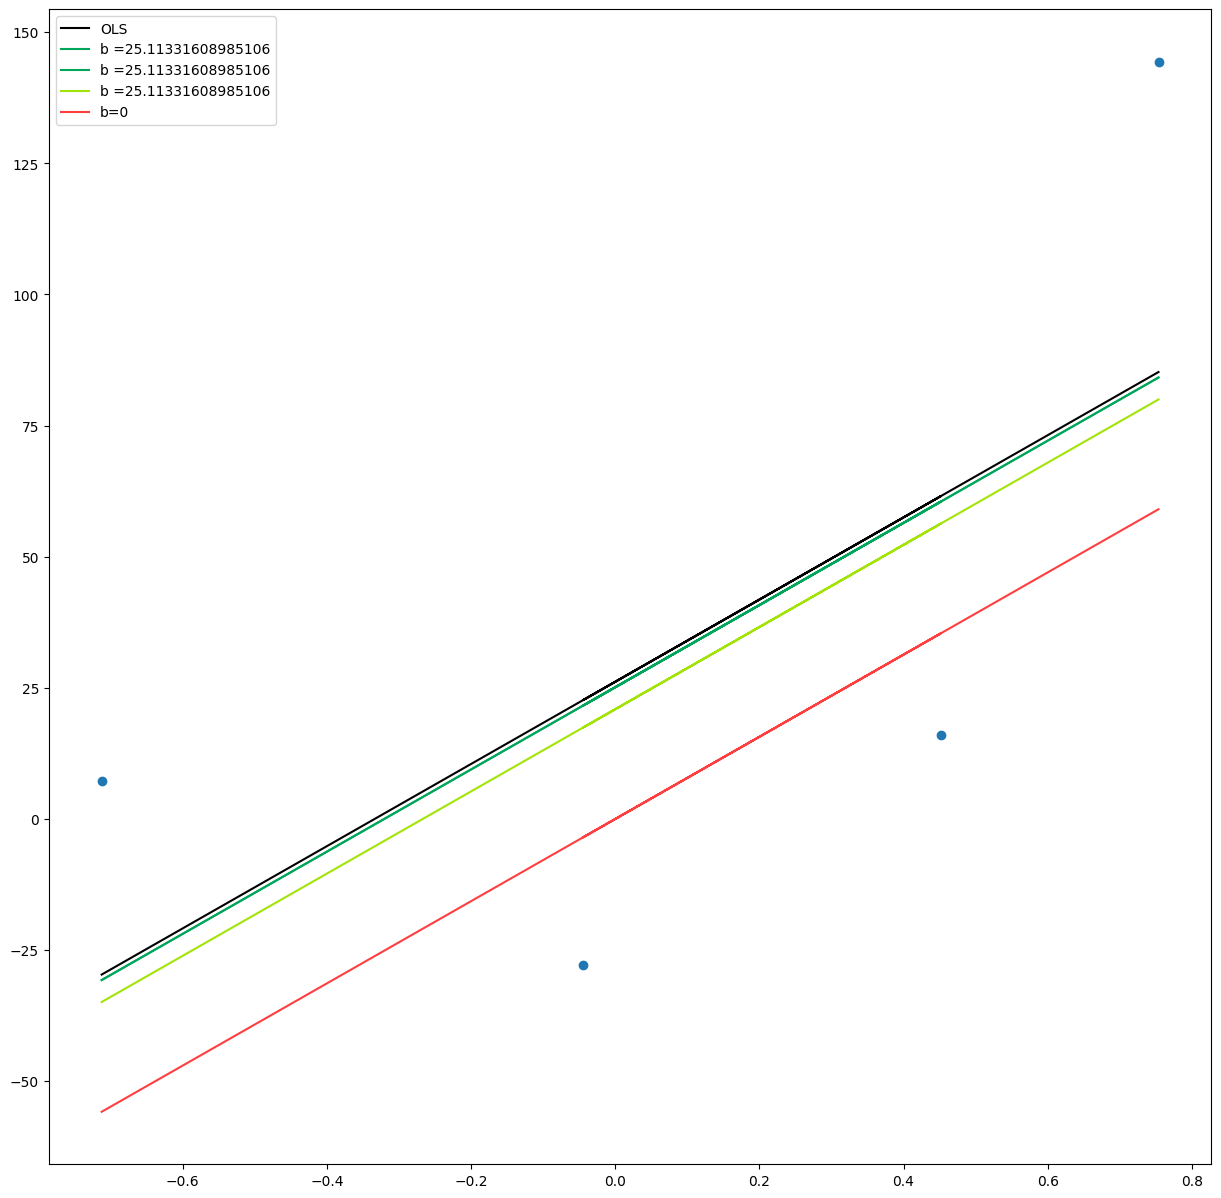

In [58]:
y_pred3=((78.35* X)+b).reshape(4)

plt.figure(figsize=(15,15))
plt.scatter(X,y)
plt.plot(X,reg.predict(X),color='black',label='OLS')
plt.plot(X,y_pred3,color="#00a65a",label='b ={}'.format(b))
plt.plot(X,y_pred2,color="#00a65a",label='b ={}'.format(b))
plt.plot(X,y_pred1,color="#A3E407",label='b ={}'.format(b))
plt.plot(X,y_pred,color='#FF3E40',label='b=0')
plt.legend()
plt.show()

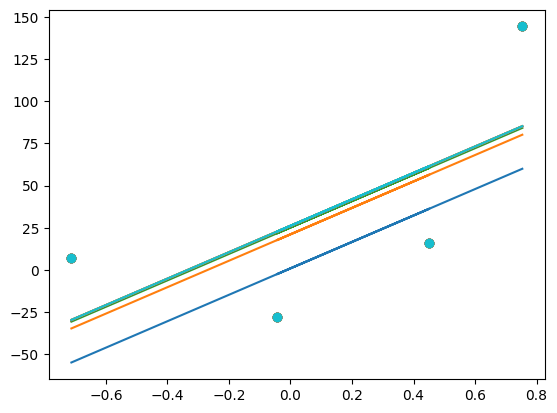

In [60]:
b= -100
m=78.35
lr=0.1

epochs=10
for i in range(epochs):
  loss_slope=-2 * np.sum(y -m *X.ravel() -b)
  b=b-(lr * loss_slope)

  y_pred=m*X+b
  plt.plot(X,y_pred)
  plt.scatter(X,y)


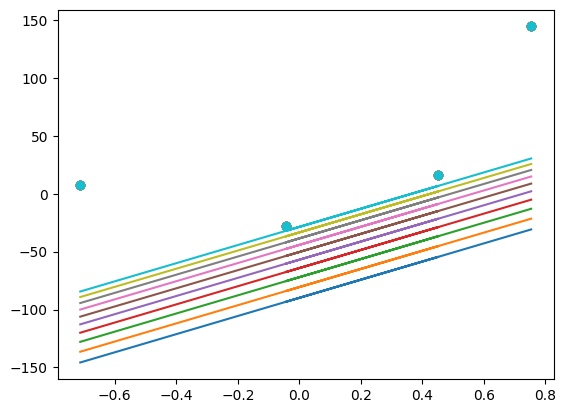

In [61]:
b= -100
m=78.35
lr=0.01

epochs=10
for i in range(epochs):
  loss_slope=-2 * np.sum(y -m *X.ravel() -b)
  b=b-(lr * loss_slope)

  y_pred=m*X+b
  plt.plot(X,y_pred)
  plt.scatter(X,y)


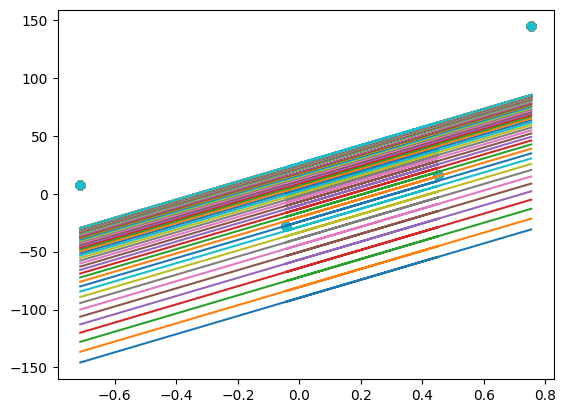

In [62]:
b= -100
m=78.35
lr=0.01

epochs=100
for i in range(epochs):
  loss_slope=-2 * np.sum(y -m *X.ravel() -b)
  b=b-(lr * loss_slope)

  y_pred=m*X+b
  plt.plot(X,y_pred)
  plt.scatter(X,y)
